# IMPORT LIBRARY

In [1]:
# Mengimport Library yang sering digunakan
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tq

# library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns



# Mengimport Libraries untuk pemrosesan data gambar
import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

# Libraries untuk pembangunan model transfer learning dengan Xception
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import RandomBrightness, RandomFlip, RandomRotation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')

2025-05-30 14:29:45.377320: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748615385.560218      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748615385.612742      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# LOAD DATASET

In [3]:
# Path ke direktori dataset di Kaggle
train_dir = '/kaggle/input/capstone-dataset/fix-dataset'

# Menyimpan jumlah gambar per kelas
class_counts = {}

# Iterasi ke tiap subfolder (kelas)
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len([f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        class_counts[class_name] = num_images

# Menampilkan jumlah gambar per kelas
for class_name, count in class_counts.items():
    print(f"Kelas {class_name}: {count} gambar")


Kelas Nail_psoriasis: 1100 gambar
Kelas acne: 1043 gambar
Kelas hyperpigmentation: 1028 gambar
Kelas SJS-TEN: 1154 gambar
Kelas Vitiligo: 1100 gambar


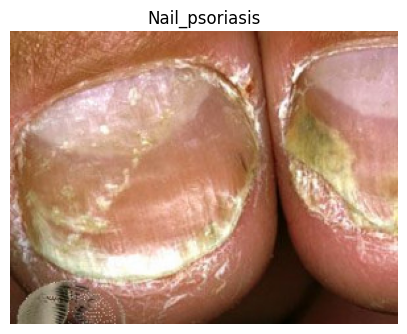

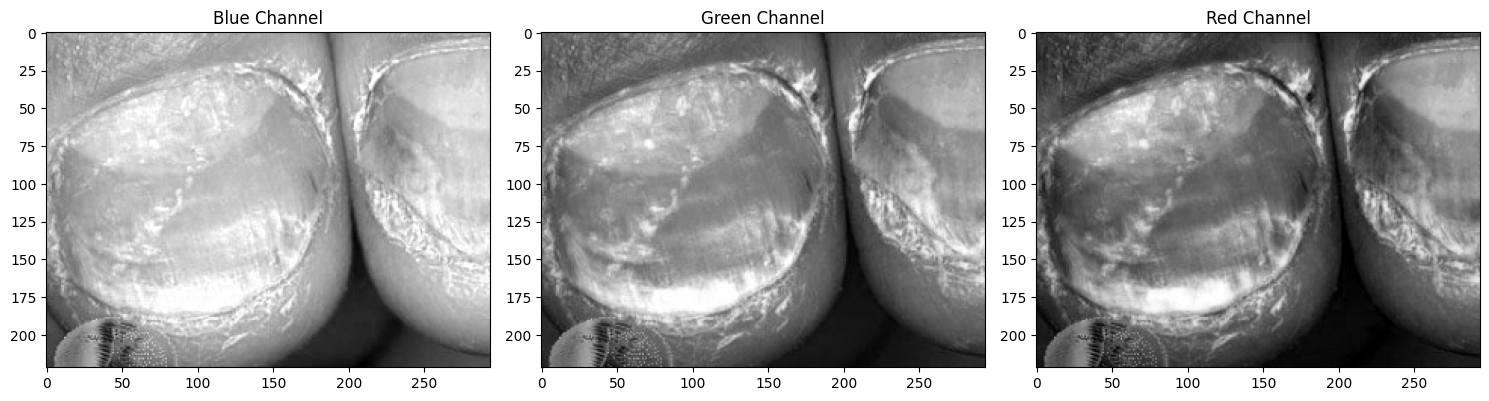

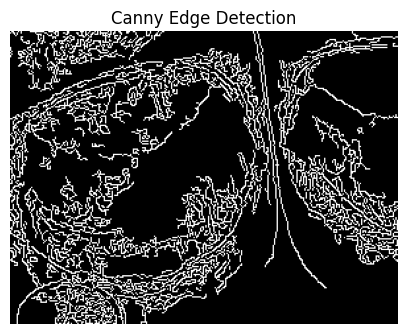

In [60]:
img = cv2.imread('/kaggle/input/capstone-dataset/fix-dataset/Nail_psoriasis/3230__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsInkiLDM2XQ.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert to RGB
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title('Nail_psoriasis')
plt.axis("off")
plt.show()

b, g, r = cv2.split(img)
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.imshow(b, cmap='gray')
plt.title("Blue Channel")

plt.subplot(1,3,2)
plt.imshow(g, cmap='gray')
plt.title("Green Channel")

plt.subplot(1,3,3)
plt.imshow(r, cmap='gray')
plt.title("Red Channel")

plt.tight_layout()
plt.show()

canny = cv2.Canny(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), 50, 170)
plt.figure(figsize=(5,5))
plt.imshow(canny, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")
plt.show()


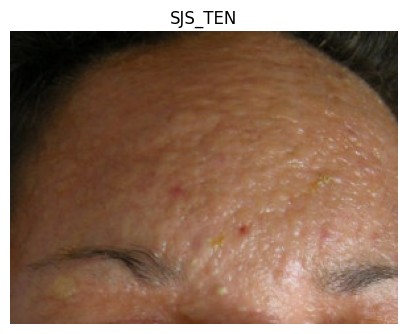

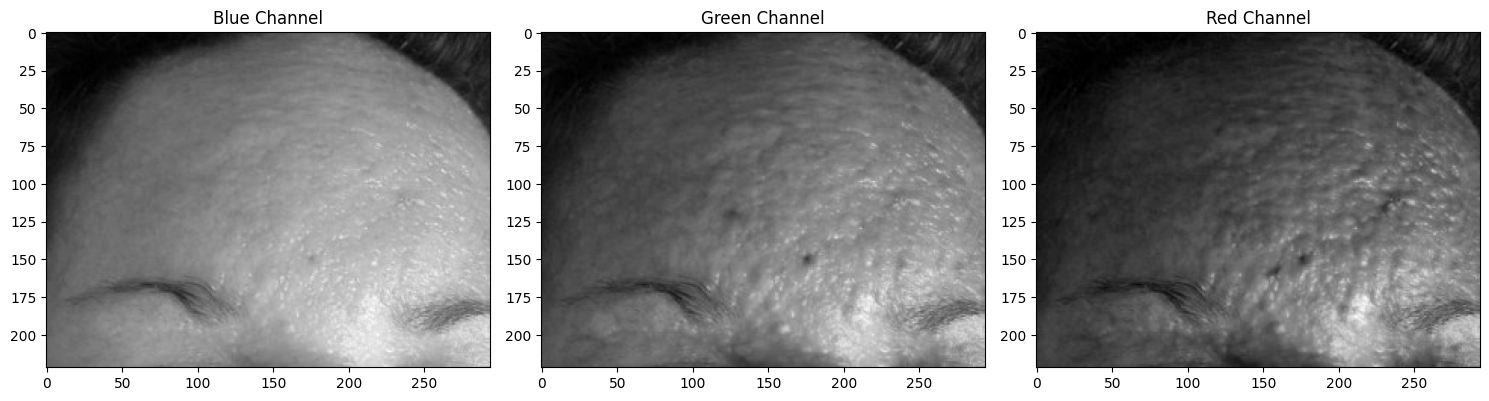

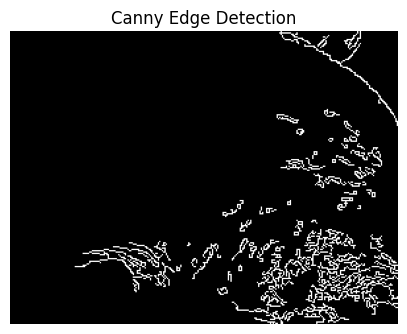

In [61]:
img = cv2.imread('/kaggle/input/capstone-dataset/fix-dataset/SJS-TEN/Crop-0350_0300sjs-ten-face-29__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDM4XQ.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert to RGB
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title('SJS_TEN')
plt.axis("off")
plt.show()

b, g, r = cv2.split(img)
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.imshow(b, cmap='gray')
plt.title("Blue Channel")

plt.subplot(1,3,2)
plt.imshow(g, cmap='gray')
plt.title("Green Channel")

plt.subplot(1,3,3)
plt.imshow(r, cmap='gray')
plt.title("Red Channel")

plt.tight_layout()
plt.show()

canny = cv2.Canny(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), 50, 170)
plt.figure(figsize=(5,5))
plt.imshow(canny, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")
plt.show()


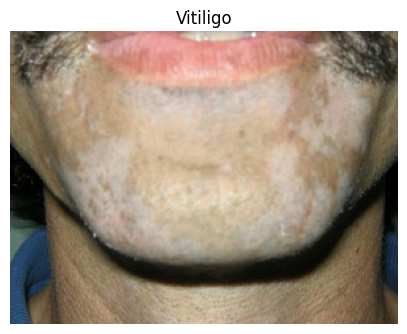

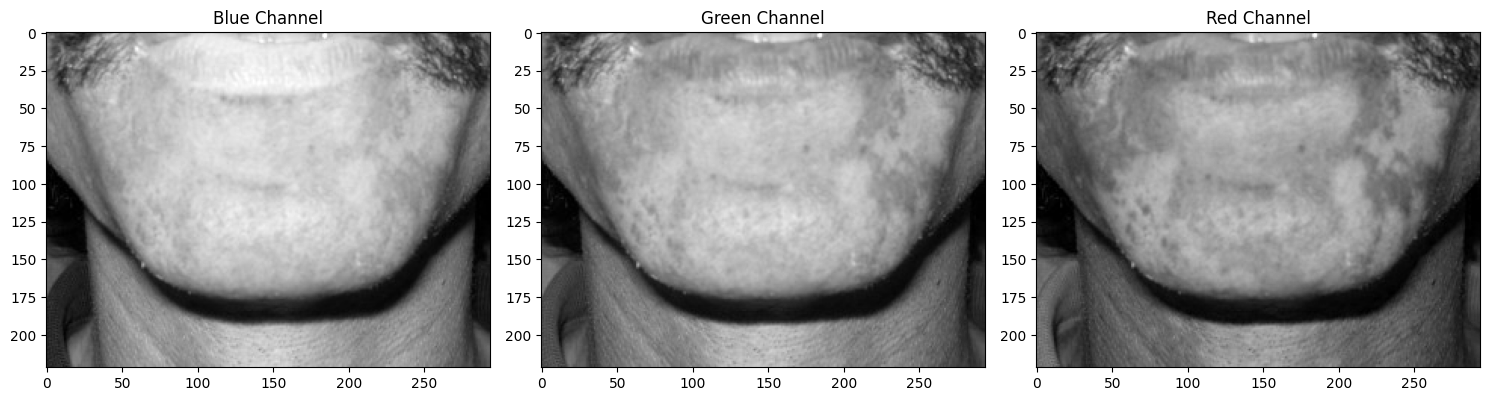

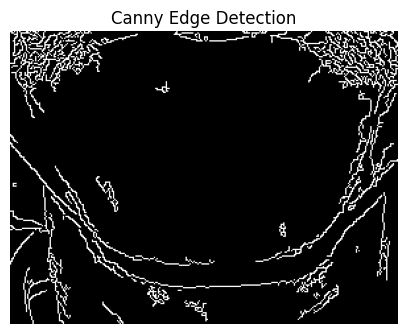

In [62]:
img = cv2.imread('/kaggle/input/capstone-dataset/fix-dataset/Vitiligo/Crop-0350_0300vitiligo-24__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert to RGB
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title('Vitiligo')
plt.axis("off")
plt.show()

b, g, r = cv2.split(img)
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.imshow(b, cmap='gray')
plt.title("Blue Channel")

plt.subplot(1,3,2)
plt.imshow(g, cmap='gray')
plt.title("Green Channel")

plt.subplot(1,3,3)
plt.imshow(r, cmap='gray')
plt.title("Red Channel")

plt.tight_layout()
plt.show()

canny = cv2.Canny(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), 50, 170)
plt.figure(figsize=(5,5))
plt.imshow(canny, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")
plt.show()


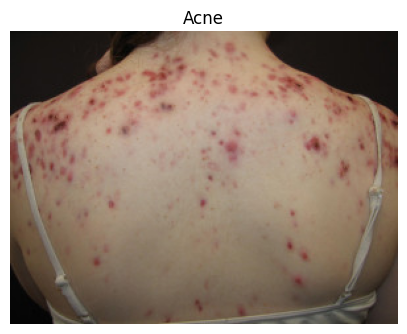

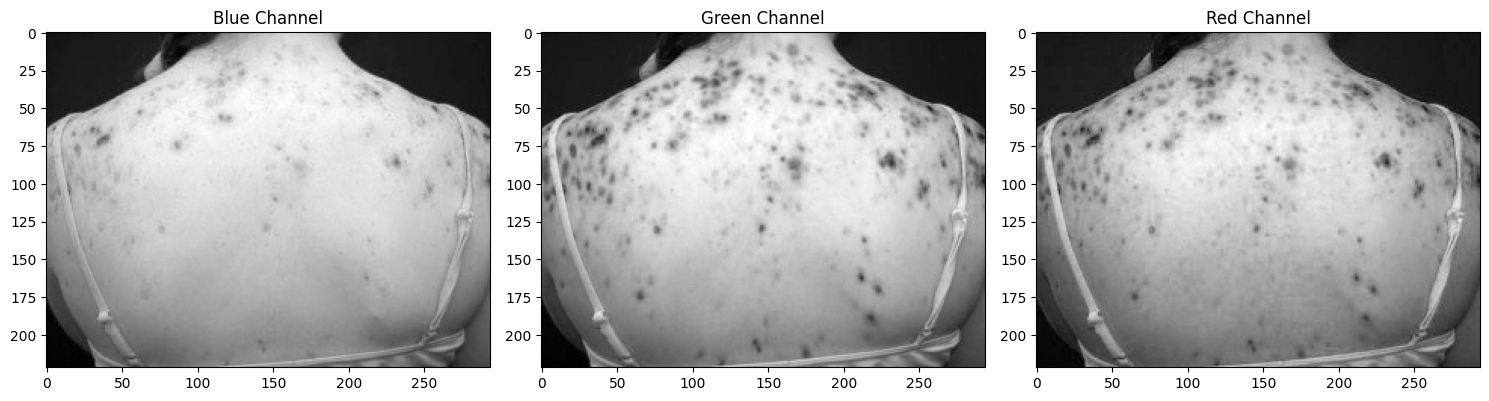

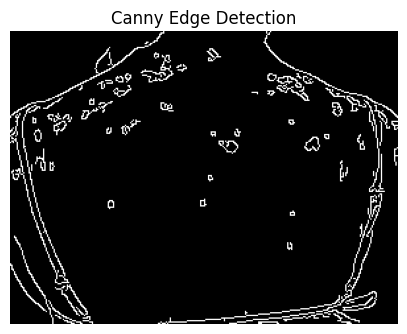

In [63]:
img = cv2.imread('/kaggle/input/capstone-dataset/fix-dataset/acne/146__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDEwXQ.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert to RGB
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title('Acne')
plt.axis("off")
plt.show()

b, g, r = cv2.split(img)
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.imshow(b, cmap='gray')
plt.title("Blue Channel")

plt.subplot(1,3,2)
plt.imshow(g, cmap='gray')
plt.title("Green Channel")

plt.subplot(1,3,3)
plt.imshow(r, cmap='gray')
plt.title("Red Channel")

plt.tight_layout()
plt.show()

canny = cv2.Canny(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), 50, 170)
plt.figure(figsize=(5,5))
plt.imshow(canny, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")
plt.show()


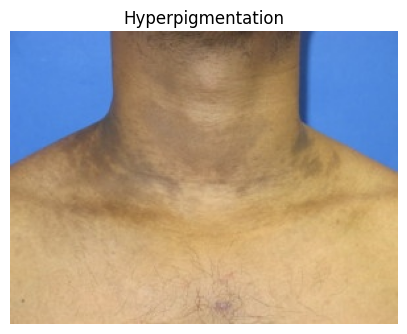

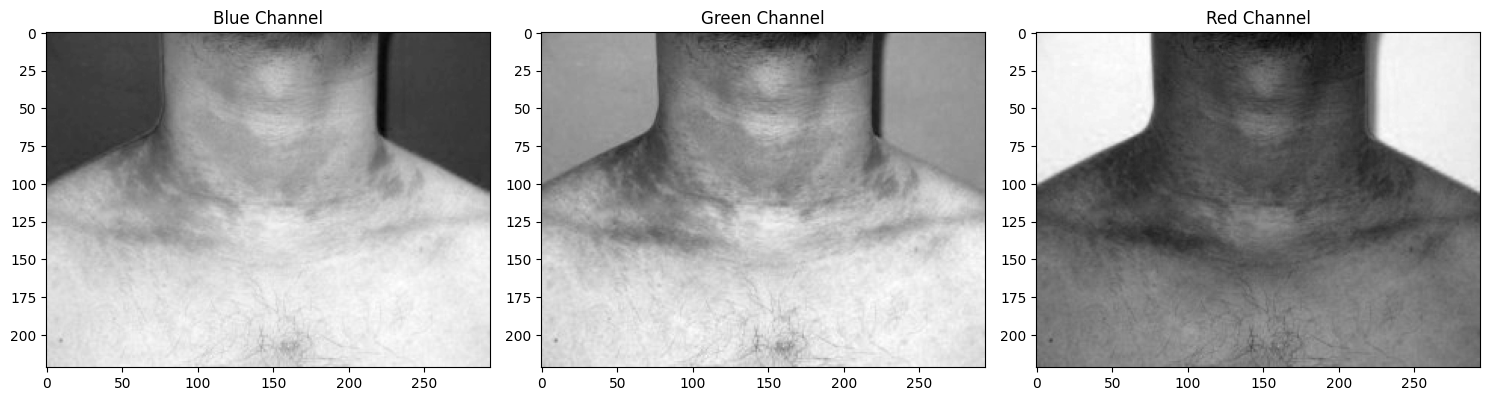

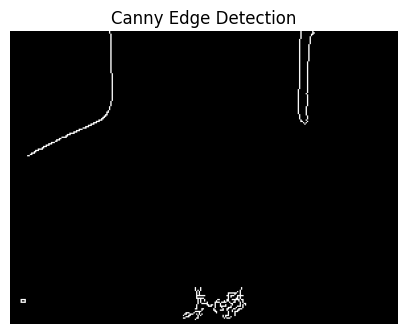

In [65]:
img = cv2.imread('/kaggle/input/capstone-dataset/fix-dataset/hyperpigmentation/Crop-0350_0300acquired-dermal-macular-hyperpigmentation-009__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert to RGB
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title('Hyperpigmentation')
plt.axis("off")
plt.show()

b, g, r = cv2.split(img)
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.imshow(b, cmap='gray')
plt.title("Blue Channel")

plt.subplot(1,3,2)
plt.imshow(g, cmap='gray')
plt.title("Green Channel")

plt.subplot(1,3,3)
plt.imshow(r, cmap='gray')
plt.title("Red Channel")

plt.tight_layout()
plt.show()

canny = cv2.Canny(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), 50, 170)
plt.figure(figsize=(5,5))
plt.imshow(canny, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")
plt.show()


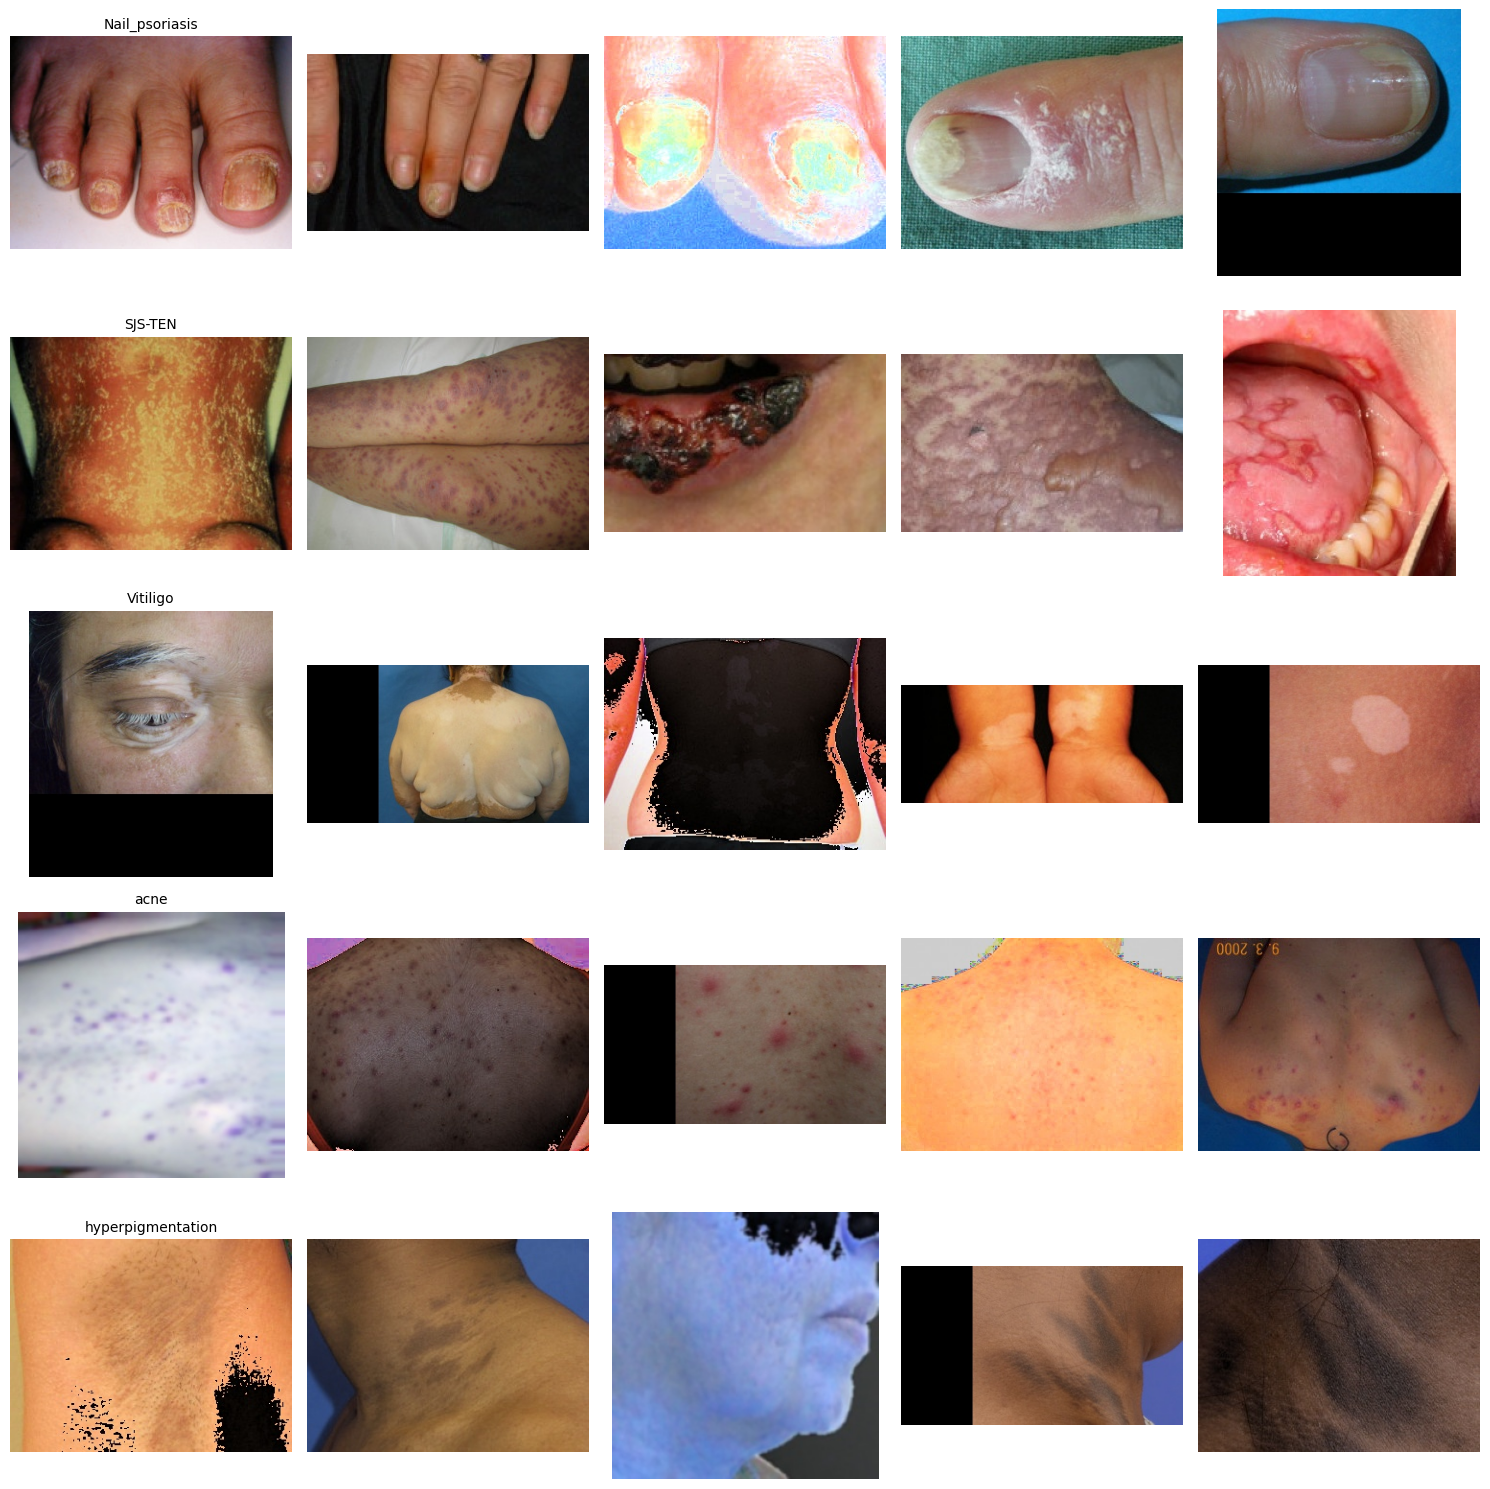

In [4]:
import matplotlib.image as mpimg

# Path ke direktori training
train_dir = '/kaggle/input/capstone-dataset/fix-dataset'

# Menampilkan 5 gambar dari setiap kelas
num_images = 5
classes = sorted(os.listdir(train_dir))  # urutkan agar rapi

plt.figure(figsize=(15, len(classes) * 3))

for i, class_name in enumerate(classes):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        # Ambil 5 gambar secara acak dari kelas ini
        images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        selected_images = random.sample(images, min(num_images, len(images)))

        for j, img_name in enumerate(selected_images):
            img_path = os.path.join(class_path, img_name)
            img = mpimg.imread(img_path)

            ax = plt.subplot(len(classes), num_images, i * num_images + j + 1)
            plt.imshow(img)
            plt.axis('off')
            if j == 0:
                ax.set_title(class_name, fontsize=10)

plt.tight_layout()
plt.show()

# SPLIT DATASET

In [4]:
from tqdm import tqdm
# Path tujuan split
origin_dir = '/kaggle/input/capstone-dataset/fix-dataset'
base_dir = '/kaggle/working/split_data'
split_types = ['train', 'val', 'test']

# Membuat folder untuk split
for split in split_types:
    for class_name in os.listdir(origin_dir):
        os.makedirs(os.path.join(base_dir, split, class_name), exist_ok=True)

# Membaca semua file dan label
image_paths = []
labels = []

for class_name in os.listdir(origin_dir):
    class_path = os.path.join(origin_dir, class_name)
    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            image_paths.append(os.path.join(class_path, filename))
            labels.append(class_name)

print(f"Total gambar ditemukan: {len(image_paths)}")

# Membagi data
train_paths, temp_paths, train_labels, temp_labels = train_test_split(
    image_paths, labels, test_size=0.1, stratify=labels, random_state=42)

val_paths, test_paths, val_labels, test_labels = train_test_split(
    temp_paths, temp_labels, test_size=0.5, stratify=temp_labels, random_state=42)

print(f"Jumlah data -> Train: {len(train_paths)}, Val: {len(val_paths)}, Test: {len(test_paths)}")

# Fungsi copy file ke folder
def copy_files(file_paths, labels, split_type):
    for file_path, label in tqdm(zip(file_paths, labels), total=len(file_paths), desc=f"Copying {split_type} data"):
        filename = os.path.basename(file_path)
        dest_path = os.path.join(base_dir, split_type, label, filename)
        shutil.copy(file_path, dest_path)

# Copy file
copy_files(train_paths, train_labels, 'train')
copy_files(val_paths, val_labels, 'val')
copy_files(test_paths, test_labels, 'test')

Total gambar ditemukan: 5425
Jumlah data -> Train: 4882, Val: 271, Test: 272


Copying test data: 100%|██████████| 272/272 [00:01<00:00, 207.25it/s]


# AUGMENTATION

In [6]:
# Direktori dataset
TRAIN_DIR = "/kaggle/working/split_data/train"
VAL_DIR = "/kaggle/working/split_data/val"
TEST_DIR = "/kaggle/working/split_data/test"

categories = ['acne', 'hyperpigmentation', 'Nail_psoriasis','SJS-TEN','Vitiligo']

# Cek jumlah gambar per kelas di training dan testing
for cat in categories:
    print(f"Train - {cat}: {len(os.listdir(os.path.join(TRAIN_DIR, cat)))} gambar")
    print(f"Validation  - {cat}: {len(os.listdir(os.path.join(VAL_DIR, cat)))} gambar")
    print(f"Test  - {cat}: {len(os.listdir(os.path.join(TEST_DIR, cat)))} gambar\n")


Train - acne: 939 gambar
Validation  - acne: 52 gambar
Test  - acne: 52 gambar

Train - hyperpigmentation: 925 gambar
Validation  - hyperpigmentation: 51 gambar
Test  - hyperpigmentation: 52 gambar

Train - Nail_psoriasis: 990 gambar
Validation  - Nail_psoriasis: 55 gambar
Test  - Nail_psoriasis: 55 gambar

Train - SJS-TEN: 1038 gambar
Validation  - SJS-TEN: 58 gambar
Test  - SJS-TEN: 58 gambar

Train - Vitiligo: 990 gambar
Validation  - Vitiligo: 55 gambar
Test  - Vitiligo: 55 gambar



In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image Augmentation untuk training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split = 0.2
)

# Image preprocessing untuk test data (tidak pakai augmentasi)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load gambar dari direktori dan buat batch
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(224, 224),     # sesuaikan dengan input model kamu
    batch_size=32,
    class_mode='categorical',   # pakai 'categorical' jika lebih dari 2 kelas
    subset = 'training',
    shuffle=True
    
)


validation_generator = test_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)



test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 3907 images belonging to 5 classes.
Found 271 images belonging to 5 classes.
Found 272 images belonging to 5 classes.


In [13]:
print(train_generator.class_indices)

{'Nail_psoriasis': 0, 'SJS-TEN': 1, 'Vitiligo': 2, 'acne': 3, 'hyperpigmentation': 4}


# MODELLING

## TRANSFER LEARNING

In [15]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load model VGG16 tanpa top layer (tanpa klasifikasi bawaan)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze semua layer awalnya


In [16]:
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(5, activation='softmax')(x)  # ganti 5 dengan jumlah kelasmu

model = Model(inputs=base_model.input, outputs=output)


In [17]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,138,757 (80.64 MB)

 Trainable params: 6,424,069 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [18]:
# model sequential dengan cov2D dan poolinglayer
model = Sequential([
    base_model,

    # menambahkan Conv2D dan Pooling Layer setelah Xception
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax') #fully connected layer
])

In [19]:
# mengkompilasi model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 7, 7, 64)            │         294,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,100,677 (57.60 MB)

 Trainable params: 385,989 (1.47 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [20]:
# membuat Custom Callback: Stop jika training dan validation accuracy >= threshold
class EarlyStoppingCustomBothAcc(Callback):
    """
    Custom Callback untuk menghentikan pelatihan jika 
    accuracy training dan validation mencapai threshold 98%.
    """
    def __init__(self, target_accuracy=0.98):
        super().__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        """
        Pelatihan diberhentikan jika training dan validation accuracy 98% dengan
        mengecek train dan valid.
        """
        train_acc = logs.get('accuracy')
        val_acc = logs.get('val_accuracy')

        if train_acc is not None and val_acc is not None:
            if train_acc >= self.target_accuracy and val_acc >= self.target_accuracy:
                print(f"\nEpoch {epoch+1}: Training & Validation Accuracy mencapai target {self.target_accuracy*100:.2f}%. Training model diberhentikan.")
                self.model.stop_training = True

# Callbacks keras
earlystop_keras = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_learningRate = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# menggabugkan callback
callbacks = [EarlyStoppingCustomBothAcc(target_accuracy=0.98), earlystop_keras, reduce_learningRate]


In [21]:
# melatih model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/25


I0000 00:00:1748615840.379599     202 service.cc:148] XLA service 0x7eca4c0059f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748615840.380473     202 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1748615840.380497     202 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1748615840.828882     202 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/123 ━━━━━━━━━━━━━━━━━━━━ 31:54 16s/step - accuracy: 0.2812 - loss: 1.7574

I0000 00:00:1748615853.395819     202 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


123/123 ━━━━━━━━━━━━━━━━━━━━ 48s 263ms/step - accuracy: 0.2783 - loss: 1.5887 - val_accuracy: 0.5314 - val_loss: 1.1852 - learning_rate: 1.0000e-04
Epoch 2/25
123/123 ━━━━━━━━━━━━━━━━━━━━ 22s 175ms/step - accuracy: 0.5331 - loss: 1.1649 - val_accuracy: 0.7048 - val_loss: 0.8810 - learning_rate: 1.0000e-04
Epoch 3/25
123/123 ━━━━━━━━━━━━━━━━━━━━ 23s 187ms/step - accuracy: 0.6536 - loss: 0.9240 - val_accuracy: 0.7528 - val_loss: 0.7231 - learning_rate: 1.0000e-04
Epoch 4/25
123/123 ━━━━━━━━━━━━━━━━━━━━ 24s 195ms/step - accuracy: 0.7255 - loss: 0.7569 - val_accuracy: 0.7749 - val_loss: 0.6096 - learning_rate: 1.0000e-04
Epoch 5/25
123/123 ━━━━━━━━━━━━━━━━━━━━ 26s 210ms/step - accuracy: 0.7647 - loss: 0.6305 - val_accuracy: 0.8229 - val_loss: 0.4995 - learning_rate: 1.0000e-04
Epoch 6/25
123/123 ━━━━━━━━━━━━━━━━━━━━ 27s 216ms/step - accuracy: 0.8150 - loss: 0.5182 - val_accuracy: 0.8450 - val_loss: 0.4300 - learning_rate: 1.0000e-04
Epoch 7/25
123/123 ━━━━━━━━━━━━━━━━━━━━ 25s 206ms/step - 

# EVALUATION & VISUALIZING

In [22]:
# Evaluasi pada data training
loss_train, accuracy_train = model.evaluate(train_generator, verbose=1)
print('=== Evaluasi Data Train ===')
print('Loss      :', loss_train)
print('Accuracy  :', accuracy_train)

# Evaluasi pada data validasi
loss_val, accuracy_val = model.evaluate(validation_generator, verbose=1)
print('\n=== Evaluasi Data Validasi ===')
print('Loss      :', loss_val)
print('Accuracy  :', accuracy_val)

# Evaluasi pada data testing
loss_test, accuracy_test = model.evaluate(test_generator, verbose=1)
print('\n=== Evaluasi Data Testing ===')
print('Loss      :', loss_test)
print('Accuracy  :', accuracy_test)

123/123 ━━━━━━━━━━━━━━━━━━━━ 24s 192ms/step - accuracy: 0.9874 - loss: 0.0397
=== Evaluasi Data Train ===
Loss      : 0.0417875312268734
Accuracy  : 0.9874584078788757
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - accuracy: 0.9317 - loss: 0.1872

=== Evaluasi Data Validasi ===
Loss      : 0.18124258518218994
Accuracy  : 0.937269389629364
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9276 - loss: 0.1611 

=== Evaluasi Data Testing ===
Loss      : 0.1653853803873062
Accuracy  : 0.9338235259056091


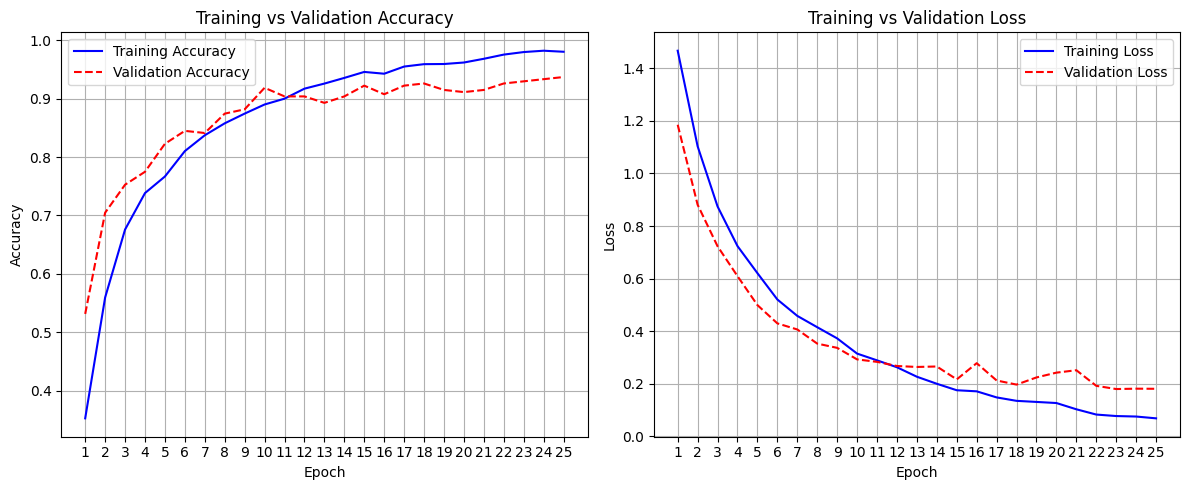

In [23]:
# Ambil data dari history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1, len(acc) + 1))  # <- Ini membuat angka 1, 2, 3, dst

# Plot Akurasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r--', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(epochs)  # <-- Menampilkan angka bulat di sumbu X
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r--', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epochs)  # <-- Menampilkan angka bulat di sumbu X
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 256ms/step
=== Classification Report ===
                   precision    recall  f1-score   support

   Nail_psoriasis       1.00      0.93      0.96        55
          SJS-TEN       0.93      0.91      0.92        58
         Vitiligo       0.79      0.95      0.86        55
             acne       1.00      0.96      0.98        52
hyperpigmentation       1.00      0.92      0.96        52

         accuracy                           0.93       272
        macro avg       0.94      0.93      0.94       272
     weighted avg       0.94      0.93      0.94       272



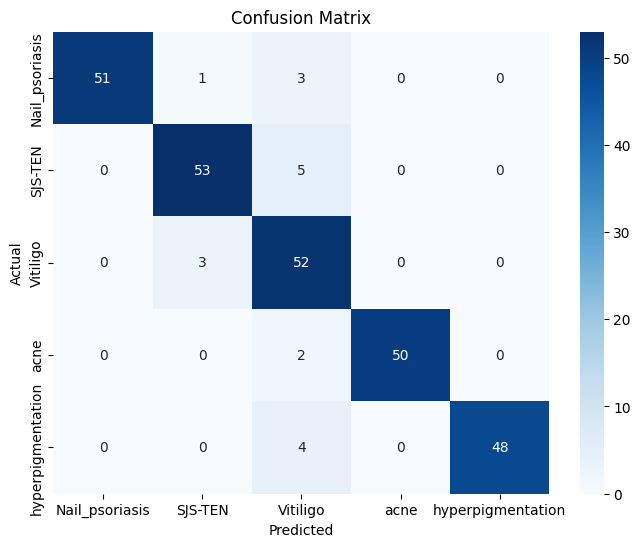

In [24]:
# Mendapatkan prediksi
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Mendapatkan label asli
y_true = test_generator.classes

# Nama kelas
class_labels = list(test_generator.class_indices.keys())

# Classification report
print("=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


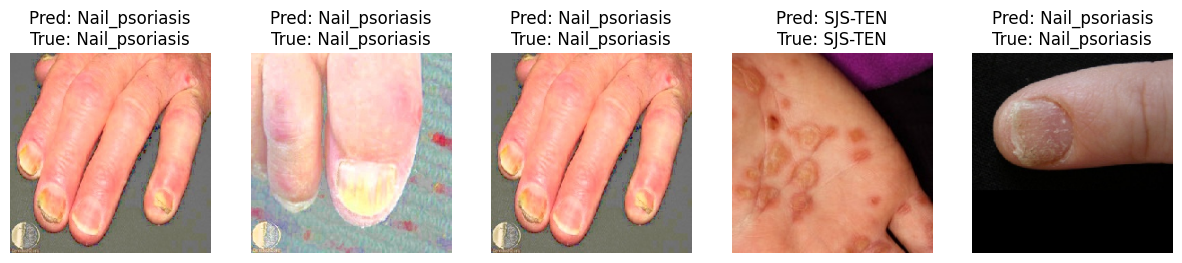

In [27]:
import random

# Ambil batch gambar dari test set
x_test, y_test = next(test_generator)
preds = model.predict(x_test)
pred_labels = np.argmax(preds, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Tampilkan 5 sampel gambar
plt.figure(figsize=(15, 5))
for i in range(5):
    idx = random.randint(0, len(x_test)-1)
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[idx])
    plt.title(f"Pred: {class_labels[pred_labels[idx]]}\nTrue: {class_labels[true_labels[idx]]}")
    plt.axis("off")
plt.show()

In [25]:
model.save('/kaggle/working/model90.keras')